In [269]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [270]:
initial_data_12M = yf.download("SBUX", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [271]:
data_12M = initial_data_12M['Adj Close']

In [272]:
data_12M.head()

Date
2020-03-02    80.747704
2020-03-03    77.042603
2020-03-04    78.091400
2020-03-05    74.680359
2020-03-06    73.847191
Name: Adj Close, dtype: float64

In [273]:
data_12M.tail()

Date
2021-02-22    101.809998
2021-02-23    101.370003
2021-02-24    104.379997
2021-02-25    103.470001
2021-02-26    108.029999
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'Figure 1: 12M Movement of the SBUX Stock')

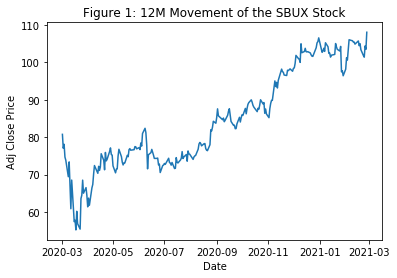

In [274]:
from pylab import plt,mpl
plt.plot(lw=1.5, label='SBUX')
data_12M.plot(figsize=(10, 12), subplots=True)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Figure 1: 12M Movement of the SBUX Stock')

In [275]:
data_12M.describe().round(2)

count    251.00
mean      84.29
std       13.13
min       55.21
25%       74.34
50%       82.30
75%       97.55
max      108.03
Name: Adj Close, dtype: float64

In [276]:
S = 108.60
print('The spot price is', round(S,2))

The spot price is 108.6


In [277]:
log_return_12M = np.log(data_12M / data_12M.shift(1))

In [278]:
vol_12M = np.sqrt(len(data_12M)) * log_return_12M.std()
print('The annualised volatility for 12 months is', round(vol_12M*100,2), '%')

The annualised volatility for 12 months is 46.07 %


In [279]:
#Next, we attempt to get the annualised volatility for 6M instead of 12M. 

In [280]:
initial_data_6M = yf.download("SBUX", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [281]:
data_6M = initial_data_6M['Adj Close']

Text(0.5, 1.0, 'Figure 2: 6M Movement of the SBUX Stock')

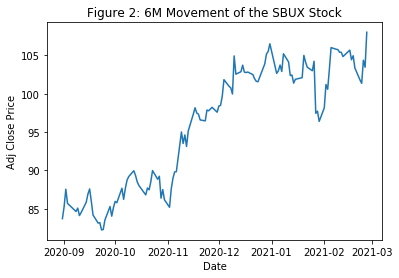

In [282]:
from pylab import plt,mpl
plt.plot(lw=1.5, label='SBUX')
data_6M.plot(figsize=(10, 12), subplots=True)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Figure 2: 6M Movement of the SBUX Stock')

In [283]:
data_6M.describe().round(2)

count    124.00
mean      95.61
std        7.94
min       82.25
25%       87.60
50%       97.67
75%      102.85
max      108.03
Name: Adj Close, dtype: float64

In [284]:
log_return_6M = np.log(data_6M / data_6M.shift(1))

In [285]:
vol_6M = np.sqrt(len(data_6M)) * log_return_6M.std()
print('The annualised volatility for 6 months is', round(vol_6M*100,2), '%')

The annualised volatility for 6 months is 18.41 %


In [286]:
data = data_12M

In [287]:
vol = (vol_12M + vol_6M)/2
print ('The annualised volatility chosen for further analysis is', round(vol*100,2), '%')

The annualised volatility chosen for further analysis is 32.24 %


In [288]:
# 2: METHODOLOGY

#1st MODEL LOOKED AT: MONTE CARLO SIMULATION

In [289]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [291]:
def mcs_simulation_np(p): 
    M = p
    I = p  
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [292]:
S = mcs_simulation_np(1000)
S

array([[108.6       , 108.6       , 108.6       , ..., 108.6       ,
        108.6       , 108.6       ],
       [108.40359824, 108.58766747, 108.49014543, ..., 108.76914944,
        108.78132395, 107.96427443],
       [108.77690772, 108.67066478, 107.96175141, ..., 108.51818383,
        108.01981221, 108.29838522],
       ...,
       [100.47485571, 115.4753364 , 104.75392378, ..., 121.46548198,
         94.60912297,  95.18971112],
       [100.67149944, 115.12126905, 104.83888254, ..., 121.35657957,
         94.57368403,  95.18268793],
       [100.63682196, 115.35892291, 104.68055694, ..., 120.74497153,
         94.56260877,  95.4762362 ]])

In [293]:
S = np.transpose(S)
S 

array([[108.6       , 108.40359824, 108.77690772, ..., 100.47485571,
        100.67149944, 100.63682196],
       [108.6       , 108.58766747, 108.67066478, ..., 115.4753364 ,
        115.12126905, 115.35892291],
       [108.6       , 108.49014543, 107.96175141, ..., 104.75392378,
        104.83888254, 104.68055694],
       ...,
       [108.6       , 108.76914944, 108.51818383, ..., 121.46548198,
        121.35657957, 120.74497153],
       [108.6       , 108.78132395, 108.01981221, ...,  94.60912297,
         94.57368403,  94.56260877],
       [108.6       , 107.96427443, 108.29838522, ...,  95.18971112,
         95.18268793,  95.4762362 ]])

Text(0.5, 1.0, 'Figure 3: Frequency distribution of the simulated end-of-period values')

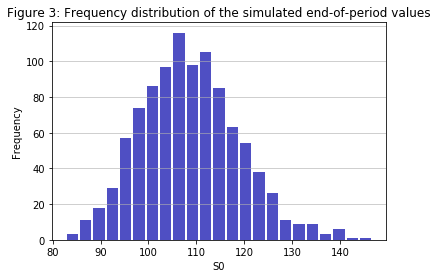

In [294]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('S0')
plt.ylabel('Frequency')
plt.title('Figure 3: Frequency distribution of the simulated end-of-period values')

In [295]:
cp = (S - K)>0 #NOT SURE!
bpc = np.mean(np.maximum(cp.astype(int),0))
print('Binary call', str(bpc))

Binary call 0.45580219780219783


In [296]:
pp = (K - S)>0  
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.5441978021978022


In [297]:
bpc + bpp

1.0

In [298]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [299]:
def binary_option_bs(S0, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset, same as saying sig as it was before, both represent the same variable. 
    #payoff: call or put
    
    d1 = (np.log(S0 / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value
#si.norm.cdf(d1, 0.0, 1.0) represents the standard normal distribution, with the input being d1. For this, we specifically
#use the scipy.stats package. This represents the cumulative distribution function for the normal distribution. Here, we
#need to use standard normal distribution. Define standard normal distribution: means that its mean is 0 and standard 
#deviation is 1. If these cdf is used for normal distribution, you still need to tell this function 0.0 and 1.0 representing
#for means and stdev. 

In [300]:
binary_option_bs(108.6, 109, 1/12, 0.0145, 0.3224, 'put')

0.5284794414479222

In [301]:
binary_option_bs(108.6, 109, 1/12, 0.0145, 0.3224, 'call')

0.4703129549595136

In [302]:
binary_option_bs(108.6, 109, 1/12, 0.0145, 0.3224, 'put') + binary_option_bs(108.6, 109, 1/12, 0.0145, 0.3224, 'call')

0.9987923964074359

In [303]:
(0.5372657342657343 + 0.5284794414479222) / 2 

0.5328725878568283

In [304]:
def binary_put_payoff(K, S0):
    if S0 <= K:
        return 1.0
    else:
        return 0.0

In [305]:
S = np.linspace(50,150,11) 
pp = np.zeros((len(S),1)) #Important for coursework, if true then $1, if not then $0. 
bpp = np.mean(np.maximum(pp.astype(int),0))

In [309]:
for i in range(len(S)):
    pp[i] = binary_option_bs(S[i], 109, 1/12, 0.0145, 0.3224, 'put')

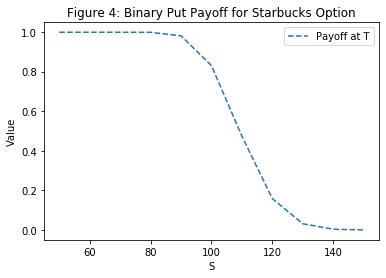

In [312]:
fig = plt.figure() #plotting option price
plt.plot(S, pp, '--') #different spot price provides you different option price.
plt.xlabel('S')
plt.ylabel('Value')
plt.title('Figure 4: Binary Put Payoff for Starbucks Option')
plt.legend(['Payoff at T'])

In [313]:
#Now, we move on to the greeks. First one: Delta

In [314]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
q = 0.0164              # continuous dividend yield
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps

In [315]:
def delta(S0, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) / (vol) * (S0) * (np.sqrt(T))
    elif payoff == "put":
        delta = -(np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) / (vol * S0 * (np.sqrt(T)))
    
    return delta

In [316]:
delta(S0, K, T, r, q, vol, 'put')

-0.0392716774422932

In [317]:
S = np.linspace(50,150,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], K, T, r, q, vol, 'put')

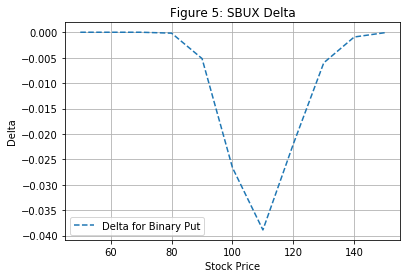

In [318]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Figure 5: SBUX Delta')
plt.legend(['Delta for Binary Put'])

In [319]:
S = np.linspace(50, 150, 51)
T = np.linspace(1/48, 1/12, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], K, T[i], r, q, vol, 'put')

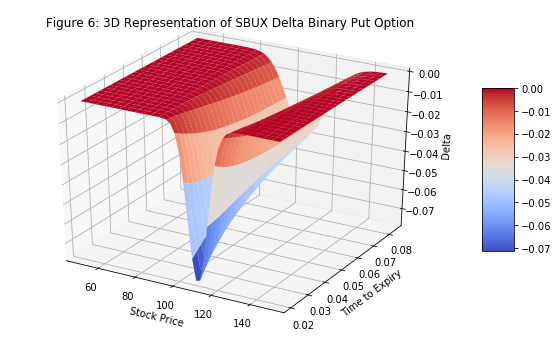

In [320]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
plt.title('Figure 6: 3D Representation of SBUX Delta Binary Put Option')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [321]:
#Next: Gamma

In [322]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
q = 0.0164              # continuous dividend yield
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps

In [323]:
def gamma(S0, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = (np.exp(-r * T) * (d1) * (si.norm.pdf(d2, 0.0, 1.0))) / (vol ** 2 * S0 ** 2 * (np.sqrt(T)))
    
    return gamma

In [324]:
gamma(S0, K, T, r, q, vol, 'put')

5.978857306360189e-06

In [325]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], K, T, r, q, vol, 'put')

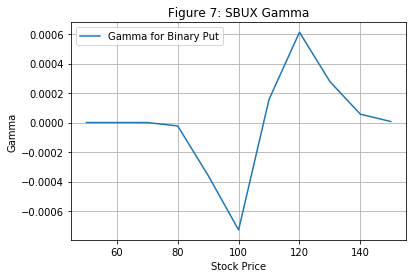

In [326]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Figure 7: SBUX Gamma')
plt.legend(['Gamma for Binary Put'])

In [327]:
S = np.linspace(50, 150, 51)
T = np.linspace(1/48, 1/12, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], r, q, vol, 'put')

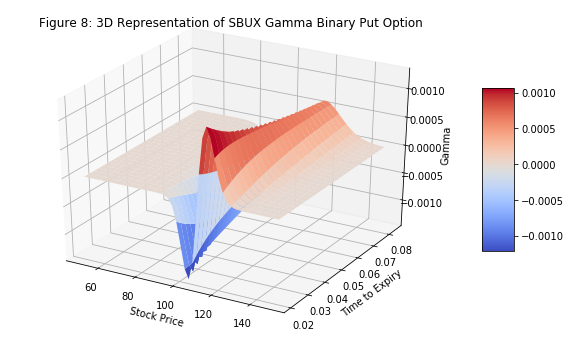

In [328]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
plt.title('Figure 8: 3D Representation of SBUX Gamma Binary Put Option')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [329]:
#Next: SPEED

In [330]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
q = 0.0164              # continuous dividend yield
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps

In [331]:
def speed(S0, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) / ((vol ** 2 * S0 ** 3 * (np.sqrt(T)))) * (-2 * d1) + ((1-(d1 * d2)) / (vol) * np.sqrt(T))
    
    return speed 

In [332]:
speed(S0, K, T, r, q, vol, 'put')

0.8958129904156457

In [333]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], K, T, r, q, vol, 'put')

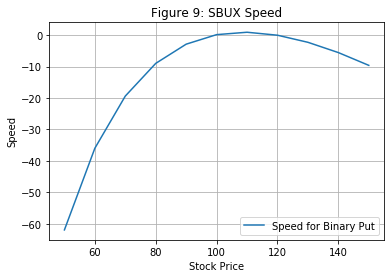

In [334]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Figure 9: SBUX Speed')
plt.legend(['Speed for Binary Put'])

In [335]:
S = np.linspace(50, 150, 51)
T = np.linspace(1/48, 1/12, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], K, T[i], r, q, vol, 'put')

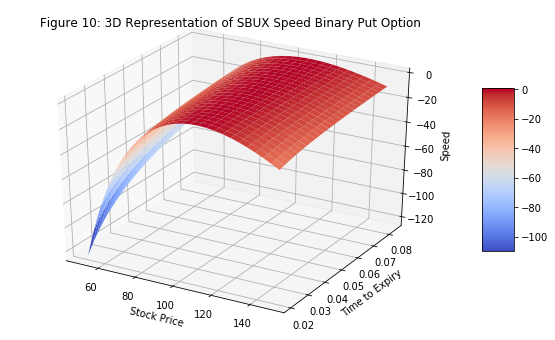

In [336]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
plt.title('Figure 10: 3D Representation of SBUX Speed Binary Put Option')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [337]:
#Next: VEGA

In [338]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
q = 0.0164              # continuous dividend yield
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  

In [339]:
def vega(S0, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    if payoff == "call":
        vega = -np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / vol)
    elif payoff == "put":
        vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / vol)

    return vega 

In [340]:
vega(S0, K, T, r, q, vol, 'put')

0.00656269542540856

In [341]:
vol= np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(108.60, 109, T, r, q, vol[i], 'put')

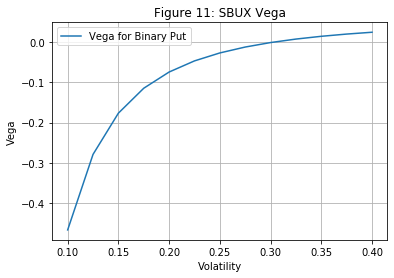

In [342]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Figure 11: SBUX Vega')
plt.legend(['Vega for Binary Put'])

In [343]:
sig = vol = 0.3224
S = np.linspace(50, 150, 51)
T = np.linspace(1/48, 1/12, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], K, T[i], r, q, vol, 'put')

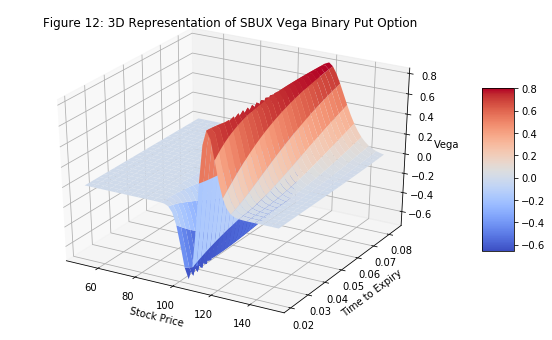

In [344]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
plt.title('Figure 12: 3D Representation of SBUX Vega Binary Put Option')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [349]:
#Finally, Rho. 

In [350]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
q = 0.0164              # continuous dividend yield
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  

In [351]:
def rho(S0, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    if payoff == "call":
        rho =  (-T) * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + ((np.sqrt(T))/ (vol)) * np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho =  (-T * np.exp(-r * T)) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - (np.sqrt(T)/ vol) * (np.exp(-r * T)) * si.norm.pdf(d2, 0.0, 1.0)
    return rho

In [352]:
rho(S0, K, T, r, q, vol, 'put')

-0.39993465506778547

In [353]:
r = np.linspace(0,0.05,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(S0, K, T, r[i], q, vol, 'put')

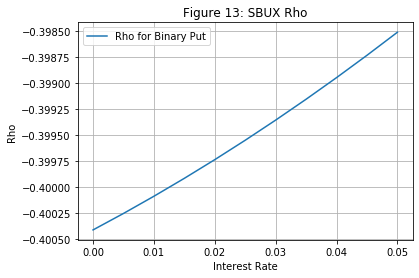

In [354]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Figure 13: SBUX Rho')
plt.legend(['Rho for Binary Put'])

In [355]:
S0 = 108.6              # spot stock price on March 1st, 2021
K = 109                 # strike
T = 1/12                # 1-month maturity 
r = 0.0145              # risk free rate on March 1st, 2021
q = 0.0164              # continuous dividend yield
sig = vol = 0.3224      # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  

In [356]:
S = np.linspace(50, 150, 51)
T = np.linspace(1/48, 1/12, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], K, T[i], r, q, vol, 'put')

array([[ 50.,  52.,  54., ..., 146., 148., 150.],
       [ 50.,  52.,  54., ..., 146., 148., 150.],
       [ 50.,  52.,  54., ..., 146., 148., 150.],
       ...,
       [ 50.,  52.,  54., ..., 146., 148., 150.],
       [ 50.,  52.,  54., ..., 146., 148., 150.],
       [ 50.,  52.,  54., ..., 146., 148., 150.]])

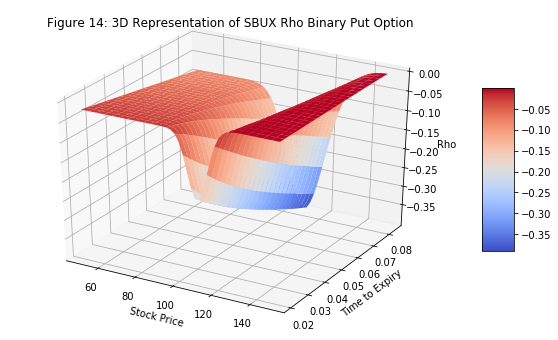

In [357]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
plt.title('Figure 14: 3D Representation of SBUX Rho Binary Put Option')
fig.colorbar(surf, shrink=0.5, aspect=5);S